# Lagrange Interpolation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def lagrange_interpolation(x_values, y_values, x):
    """
    Lagrange 다항 보간법을 이용하여 주어진 x에서의 y 값을 계산.
    
    Parameters:
    - x_values: 리스트나 배열 형태의 x 값들 (노드)
    - y_values: 각 x 값에 대응되는 y 값들
    - x: 보간하려는 x 값
    
    Returns:
    - 주어진 x에서의 보간된 y 값
    """
    
    n = len(x_values)
    result = 0.0

    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if i != j:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term

    return result

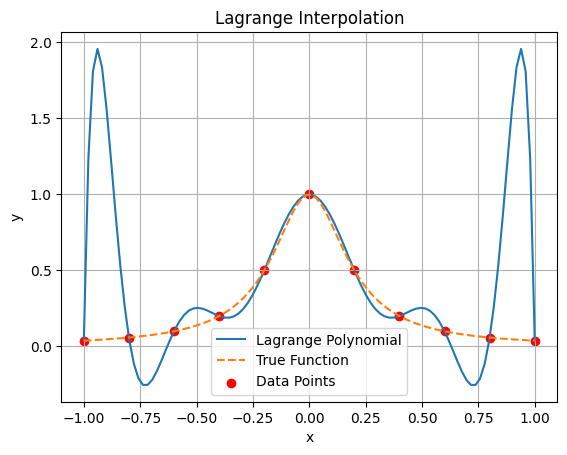

In [ ]:
# Example 1.1

# 데이터 포인트
x_points = [-1.00, -0.80, -0.60, -0.40, -0.20, 0.00, 0.20, 0.40, 0.60, 0.80, 1.00]
y_points = [0.038, 0.058, 0.100, 0.200, 0.500, 1.00, 0.500, 0.200, 0.100, 0.058, 0.038]

# 보간 곡선 그리기용
x_curve = np.linspace(min(x_points), max(x_points), 100)
y_curve = [lagrange_interpolation(x_points, y_points, xi) for xi in x_curve]

# 실제 함수
y_true = 1/(1 + 25*x_curve**2)

# 그래프 출력
plt.plot(x_curve, y_curve, label="Lagrange Polynomial")
plt.plot(x_curve, y_true, label="True Function", linestyle='dashed')
plt.scatter(x_points, y_points, color='red', label="Data Points")
plt.title("Lagrange Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Cubic Spline

In [8]:
def natural_cubic_spline(x, y):
    """
    자연경계 조건(free run-out)을 적용한 cubic spline 보간 함수 생성기.
    
    Parameters:
    - x: 노드 x 값들 (오름차순 정렬된 리스트 또는 배열)
    - y: 각 x 값에 대응되는 y 값들
    
    Returns:
    - 함수: 주어진 x에 대해 보간값을 계산하는 함수 spline(x_eval)
    """
    n = len(x)
    h = np.diff(x)  # 구간 간격
    alpha = np.zeros(n)

    # Step 1: Calculate alpha
    for i in range(1, n - 1):
        alpha[i] = (3/h[i]) * (y[i+1] - y[i]) - (3/h[i-1]) * (y[i] - y[i-1])

    # Step 2: Tridiagonal system
    l = np.ones(n)
    mu = np.zeros(n)
    z = np.zeros(n)

    for i in range(1, n - 1):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    # Step 3: Solve system
    a = y.copy()
    b = np.zeros(n - 1)
    c = np.zeros(n)
    d = np.zeros(n - 1)

    for j in reversed(range(n - 1)):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = ((a[j+1] - a[j]) / h[j]) - (h[j] * (c[j+1] + 2 * c[j]) / 3)
        d[j] = (c[j+1] - c[j]) / (3 * h[j])

    # Step 4: Return spline function
    def spline(x_eval):
        result = np.zeros_like(x_eval, dtype=float)
        for i in range(n - 1):
            mask = (x_eval >= x[i]) & (x_eval <= x[i+1])
            dx = x_eval[mask] - x[i]
            result[mask] = a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
        return result

    return spline

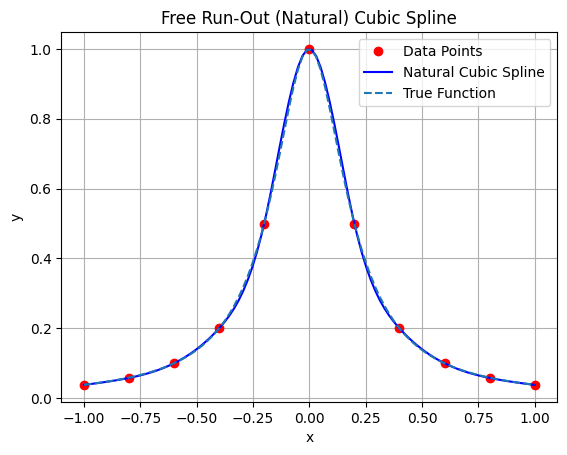

In [15]:
# 데이터 포인트
# x_vals = np.array([0, 1, 2, 3, 4])
# y_vals = np.array([0, 0.5, 2, 1.5, 1])

x_points = np.array([-1.00, -0.80, -0.60, -0.40, -0.20, 0.00, 0.20, 0.40, 0.60, 0.80, 1.00])
y_points = np.array([0.038, 0.058, 0.100, 0.200, 0.500, 1.00, 0.500, 0.200, 0.100, 0.058, 0.038])

# 스플라인 생성
spline_func = natural_cubic_spline(x_points, y_points)

# 보간된 값 계산
x_curve = np.linspace(min(x_points), max(x_points), 100)
y_curve = spline_func(x_curve)

# 그래프 출력
plt.plot(x_points, y_points, 'ro', label="Data Points")
plt.plot(x_curve, y_curve, 'b-', label="Natural Cubic Spline")
plt.plot(x_curve, y_true, label="True Function", linestyle='dashed')
plt.title("Free Run-Out (Natural) Cubic Spline")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# Numerical Differentiation

In [16]:
# 정의된 함수
def f(x):
    return np.sin(x) / x**3

# 수치 미분 함수
def numerical_derivatives(x0, h):
    # Forward Difference (1st order)
    forward = (f(x0 + h) - f(x0)) / h

    # Central Difference (2nd order)
    central = (f(x0 + h) - f(x0 - h)) / (2 * h)

    # 5-point Stencil (4th order accurate)
    # Using: f'(x) ≈ (f(x-2h) - 8f(x-h) + 8f(x+h) - f(x+2h)) / (12h)
    fourth_order = (-f(x0 + 2*h) + 8*f(x0 + h) - 8*f(x0 - h) + f(x0 - 2*h)) / (12 * h)

    return forward, central, fourth_order

In [19]:
# 테스트
x0 = 4
h = 0.01  

# 실제 미분값
def f_prime(x):
    return (x * np.cos(x) - 3 * np.sin(x))/x**4

fwd, cent, fourth = numerical_derivatives(x0, h)

print(f"Numerical derivatives of f(x) = sin(x)/x^3 at x = {x0}")
print(f" - Actual derivative:                  {f_prime(x0):.8f}")
print(f" - Forward Difference (1st order):     {fwd:.8f}")
print(f" - Central Difference (2nd order):     {cent:.8f}")
print(f" - 4th Order Accurate Derivative:      {fourth:.8f}")

Numerical derivatives of f(x) = sin(x)/x^3 at x = 4
 - Actual derivative:                  -0.00134440
 - Forward Difference (1st order):     -0.00125349
 - Central Difference (2nd order):     -0.00134487
 - 4th Order Accurate Derivative:      -0.00134440


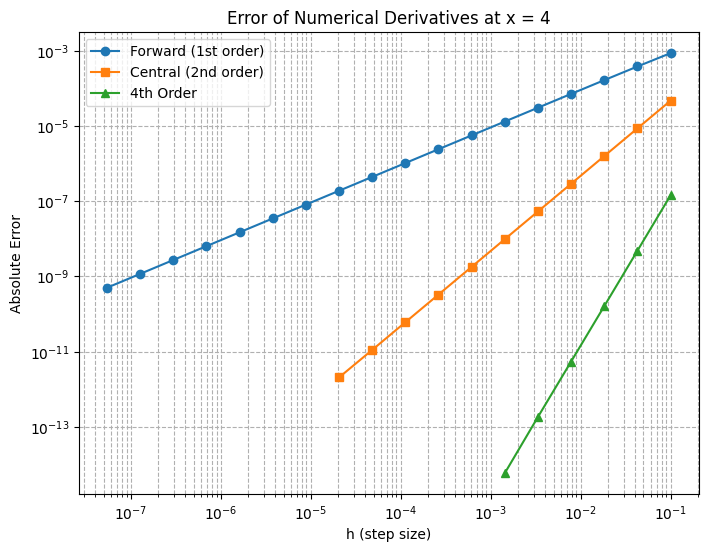

In [22]:
x0 = 4
true_deriv = f_prime(x0)

h_values = np.logspace(-1, -8, 20)
errors_forward = []
errors_central = []
errors_fourth = []

for h in h_values:
    fwd, cent, fourth = numerical_derivatives(x0, h)
    errors_forward.append(abs(fwd - true_deriv))
    errors_central.append(abs(cent - true_deriv))
    errors_fourth.append(abs(fourth - true_deriv))

# Step 5: 로그 스케일 그래프 출력
plt.figure(figsize=(8, 6))
plt.loglog(h_values[:18], errors_forward[:18], 'o-', label='Forward (1st order)')
plt.loglog(h_values[:11], errors_central[:11], 's-', label='Central (2nd order)')
plt.loglog(h_values[:6], errors_fourth[:6], '^-', label='4th Order')

plt.xlabel("h (step size)")
plt.ylabel("Absolute Error")
plt.title("Error of Numerical Derivatives at x = 4")
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()

# Modified Wavenumber

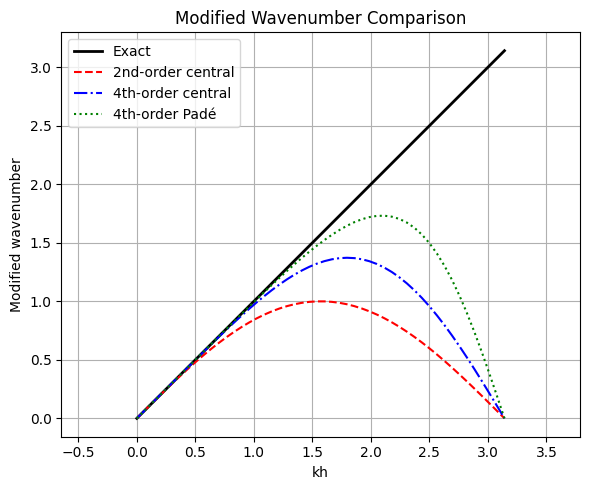

In [ ]:
hk = np.linspace(0, np.pi, 50)

wavenum_exact = hk
wavenum_2nd_o_central = np.sin(hk)
wavenum_4th_o_central = (8*np.sin(hk) - np.sin(2*hk)) / 6
wavenum_4th_o_Pade = 3* np.sin(hk) / (2 + np.cos(hk))  # Excercise 3

# 그래프 출력
plt.figure(figsize=(6, 5))
plt.plot(hk, wavenum_exact, 'k-', label='Exact', linewidth=2)
plt.plot(hk, wavenum_2nd_o_central, 'r--', label='2nd-order central')
plt.plot(hk, wavenum_4th_o_central, 'b-.', label='4th-order central')
plt.plot(hk, wavenum_4th_o_Pade, 'g:', label='4th-order Padé')

plt.xlabel("kh")
plt.ylabel("Modified wavenumber")
plt.title("Modified Wavenumber Comparison")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

# Pade Approximation

In [31]:
# 데이터
num_points = 15
x_points = np.linspace(0, 3, num_points)
y_points = np.sin(5*x_points)

# Grid 간격
h = x_points[1]-x_points[0]

# 실제 미분값
y_prime_true = 5 * np.cos(5 * x_points)

# Pade Approximation
# A * f' = b
A = 4 * np.eye(num_points)
A += np.eye(num_points, k=1)
A += np.eye(num_points, k=-1)

# Replace first row: [1, 2, 0, ..., 0]
A[0] = np.zeros(num_points)
A[0, 0] = 1
A[0, 1] = 2

# Replace last row: [0, ..., 0, 2, 1]
A[-1] = np.zeros(num_points)
A[-1, -2] = 2
A[-1, -1] = 1
print(A)


[[1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 4. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 4. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 4. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 4. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 4. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 4. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 4. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 4. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1.]]


In [33]:
b = 3*(y_points[2:] - y_points[:-2])
b = np.concatenate(([-5/2*y_points[0] + 2*y_points[1] + 1/2*y_points[2]], 
                    b, 
                    [5/2*y_points[-1] - 2*y_points[-2] - 1/2*y_points[-3]]))/h
b

array([ 10.15543459,  11.77101948, -13.30720379, -24.5158767 ,
       -10.17266118,  14.77310006,  24.32146764,   8.52057135,
       -16.16096548, -23.99859369,  -6.82347624,  17.46346942,
        23.54896026,   5.09033985,  -2.21326899])

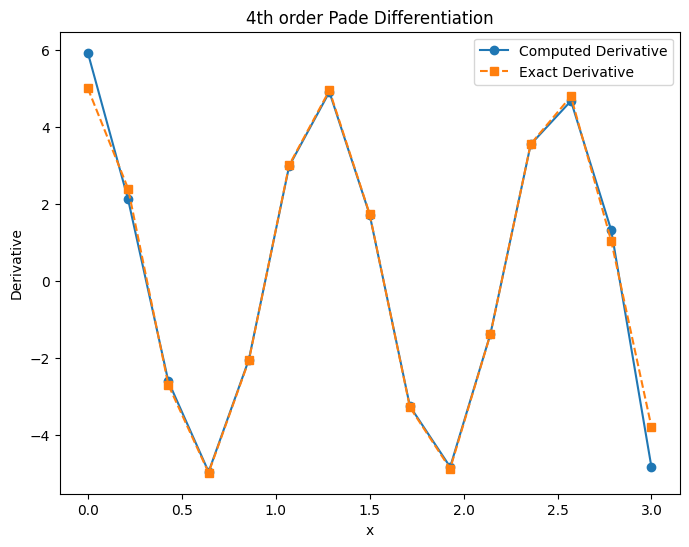

In [38]:
# Solve for f'
y_prime_approx = np.linalg.solve(A, b)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_points, y_prime_approx, 'o-', label='Computed Derivative')
plt.plot(x_points, y_prime_true, 's--', label='Exact Derivative')

plt.xlabel("x")
plt.ylabel("Derivative")
plt.title("4th order Pade Differentiation")
plt.legend()
plt.show()

# Adaptive Quadrature

In [45]:
# 정확한 함수 정의
def f(x):
    return 10 * np.exp(-50 * np.abs(x)) - 0.01 / ((x - 0.5)**2 + 0.001) + 5 * np.sin(5 * x)

# 기본 Simpson’s Rule
def simpson(f, a, b):
    c = (a + b) / 2
    return (b - a) / 6 * (f(a) + 4*f(c) + f(b))

# Adaptive Simpson's Method
def adaptive_simpson(f, a, b, tol, depth=0, max_depth=20, grid_points=None):
    c = (a + b) / 2
    S = simpson(f, a, b)
    S_left = simpson(f, a, c)
    S_right = simpson(f, c, b)
    error = np.abs(S_left + S_right - S)

    if grid_points is not None:
        grid_points.add(a)
        grid_points.add(c)
        grid_points.add(b)

    if error < 15 * tol or depth >= max_depth:
        return S_left + S_right
    else:
        left = adaptive_simpson(f, a, c, tol / 2, depth + 1, max_depth, grid_points)
        right = adaptive_simpson(f, c, b, tol / 2, depth + 1, max_depth, grid_points)
        return left + right

# 실행
a, b = -1, 1
tol = 1e-5
grid_points = set()

result = adaptive_simpson(f, a, b, tol, grid_points=grid_points)

# 정렬된 grid point 리스트
grid_points = sorted(grid_points)

# 결과 출력
print(f"Integral ≈ {result:.8f}")
print(f"Number of subintervals: {len(grid_points)-1}")


Integral ≈ -0.56682146
Number of subintervals: 150


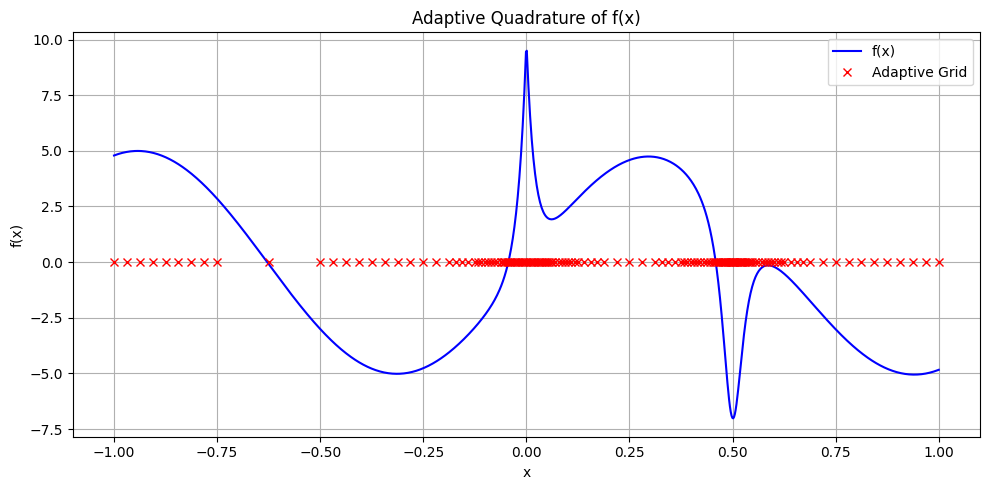

In [50]:
# 시각화
x_plot = np.linspace(a, b, 1000)
y_plot = f(x_plot)

plt.figure(figsize=(10, 5))
plt.plot(x_plot, y_plot, label="f(x)", color='blue')
plt.plot(grid_points, np.zeros_like(grid_points), 'rx', label="Adaptive Grid")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Adaptive Quadrature of f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()